In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

from DataSet import DataSet
from Circuit import Circuit

from qat.interop.qiskit import qlm_to_qiskit

from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

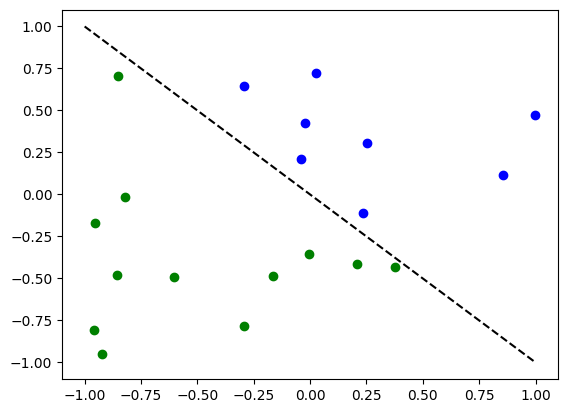

In [2]:
#Instanciamos la clase DataSet y mostramos un diagrama los datos
dataset = DataSet()
dataset.Draw()

#Instaciamos la clase circuito donde creamos un circuito cuantico y añadimos el encoding y el circuito variacional
circuit = Circuit()
circuit.ZZFeatureMap()
circuit.varCircuit3()

#Mostramos el circuito
circuit.display()

In [3]:
#Mediante interoperabilidad exportamos el circuito a qiskit
qlm_circuit = circuit.circuit()
qiskit_circuit = qlm_to_qiskit(qlm_circuit)
qiskit_circuit.remove_final_measurements()

#Mostrmos el circuito
qiskit_circuit.draw()

┌───┐┌──────────────────┐┌──────────────────┐     »
q0_0: ┤ H ├┤ Rz(2.0*varData0) ├┤ Rz(2.0*varData1) ├──■──»
      ├───┤└──────────────────┘└──────────────────┘┌─┴─┐»
q0_1: ┤ H ├────────────────────────────────────────┤ X ├»
      └───┘                                        └───┘»
«                                                    ┌───┐┌──────────────────┐»
«q0_0: ───────────────────────────────────────────■──┤ H ├┤ Rz(2.0*varData0) ├»
«      ┌───────────────────────────────────────┐┌─┴─┐├───┤└──────────────────┘»
«q0_1: ┤ Rz(2.0*(π - varData0)*(π - varData1)) ├┤ X ├┤ H ├────────────────────»
«      └───────────────────────────────────────┘└───┘└───┘                    »
«      ┌──────────────────┐                                                   »
«q0_0: ┤ Rz(2.0*varData1) ├──■─────────────────────────────────────────────■──»
«      └──────────────────┘┌─┴─┐┌───────────────────────────────────────┐┌─┴─┐»
«q0_1: ────────────────────┤ X ├┤ Rz(2.0*(π - varData0)*(π - varData1)) ├┤ X ├»
«                          └───┘└───────────────────────────────────────┘└───┘»
«      ┌───┐     ┌───────────────┐     ┌───┐
«q0_0: ┤ H ├──■──┤ Rz(varTheta0) ├──■──┤ H ├
«      └───┘┌─┴─┐├───────────────┤┌─┴─┐└───┘
«q0_1: ─────┤ X ├┤ Rz(varTheta1) ├┤ X ├─────
«           └───┘└───────────────┘└───┘

In [4]:
#Usamos un estimador que se puede utilizar para clasicficacion
estimator_qnn = EstimatorQNN(
    circuit=qiskit_circuit, input_params=qiskit_circuit.parameters[:2], weight_params=qiskit_circuit.parameters[2:]
)

In [5]:
# QNN mapea los inputs de [-1, +1]
estimator_qnn.forward(dataset.X_aux[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[-0.04073668]])

In [6]:
#Funcion callback que dibuja una grafica en vivo cuando llamamos al metodo .fit()
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [7]:
#Construimos un clasificador de red neuronal
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

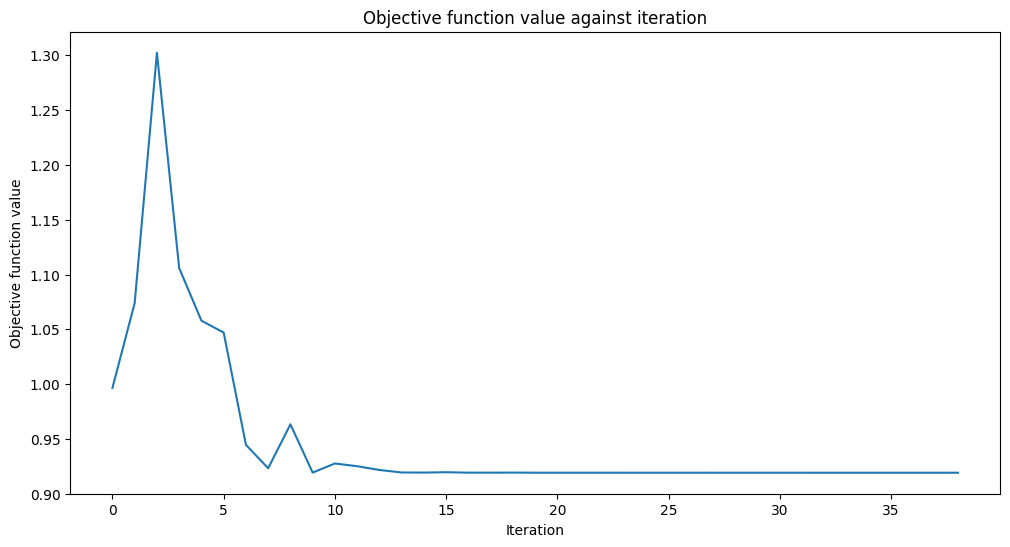

0.7

In [8]:
# Crearmos una matriz vacía para almacenar evaluaciones de la función objetivo
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# Ajustamos el clasificador a los datos
estimator_classifier.fit(dataset.X_aux, dataset.y)

# Volvemos al tamaño de figura predeterminado
plt.rcParams["figure.figsize"] = (6, 4)

# Evaluamos el clasificador
estimator_classifier.score(dataset.X_aux, dataset.y)